# Phase 3:

## Balance Data:


### - Check if the data is balanced or not:


Number of Employees who Left: 237
Number of Employees who Stayed: 1233
___
Percentage of Employees who Left: 16.12%
Percentage of Employees who Stayed: 83.88%


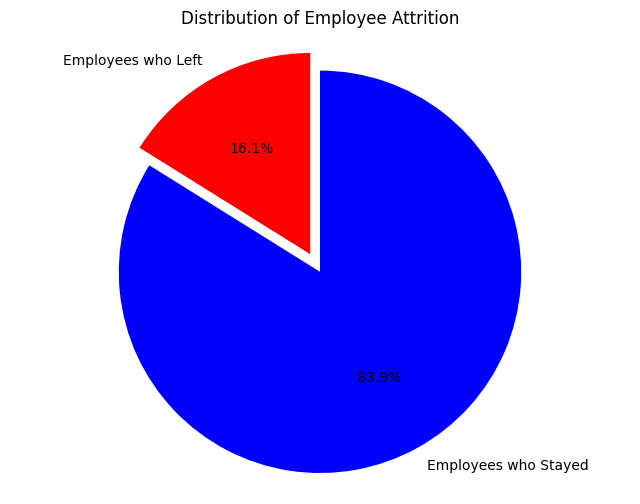

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Preprocessed_dataset.csv')
selector_values = data['Attrition']

num_class_1 = selector_values[selector_values == 1].count()
num_class_2 = selector_values[selector_values == 0].count()

total = num_class_1 + num_class_2
percentage_class_1 = (num_class_1 / total) * 100
percentage_class_2 = (num_class_2 / total) * 100

print("Number of Employees who Left:", num_class_1)
print("Number of Employees who Stayed:", num_class_2)
print("___")
print("Percentage of Employees who Left: {:.2f}%".format(percentage_class_1))
print("Percentage of Employees who Stayed: {:.2f}%".format(percentage_class_2))

labels = ['Employees who Left', 'Employees who Stayed']
sizes = [percentage_class_1, percentage_class_2]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Employee Attrition')
plt.show()


---

In the beginning, we reviewed the percentage for each of the two classes in the employee attrition analysis. The analysis showed that the number of employees who left the company was 237, while the number of employees who stayed was 1233.

The percentages were as follows:
- **Percentage of Employees who Left:** 16.12%
- **Percentage of Employees who Stayed:** 83.88%

From these results, we observe that the percentage of employees who left is relatively low compared to those who stayed. This indicates an imbalance in the distribution of classes, as the percentages do not fall within the 40% to 60% range.

--- 

### - Process of correcting data balancing:


In [81]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('Preprocessed_dataset.csv')

num_left = len(data[data['Attrition'] == 1])
num_stayed = len(data[data['Attrition'] == 0])

left_data = data[data['Attrition'] == 1]
stayed_data = data[data['Attrition'] == 0]

target_left = int(num_stayed * 0.6)
target_stayed = int(num_left * 1.5)

if num_left > target_left:
    undersampled_left = resample(left_data, replace=False, n_samples=target_left, random_state=42)
    final_data = pd.concat([undersampled_left, stayed_data])
else:
    final_data = data

if num_stayed > target_stayed:
    undersampled_stayed = resample(stayed_data, replace=False, n_samples=target_stayed, random_state=42)
    final_data = pd.concat([left_data, undersampled_stayed])
else:
    final_data = data

final_data.to_csv('AfterBalance.csv', index=False)

print("Final number of Employees who Left:", len(final_data[final_data['Attrition'] == 1]))
print("Final number of Employees who Stayed:", len(final_data[final_data['Attrition'] == 0]))




Final number of Employees who Left: 237
Final number of Employees who Stayed: 355


---

By using the "resample" function, we adjusted the number of samples in the majority class (employees who stayed) to achieve balance between the two classes. This helps prevent the model from being biased towards the majority class and improves its ability to generalize to new data. The final number of employees who left is 237, while the number of employees who stayed is 355, reflecting a more balanced representation of the classes.

--- 

### - Data after the balancing process:


Percentage of Employees who Left: 40.03%
Percentage of Employees who Stayed: 59.97%


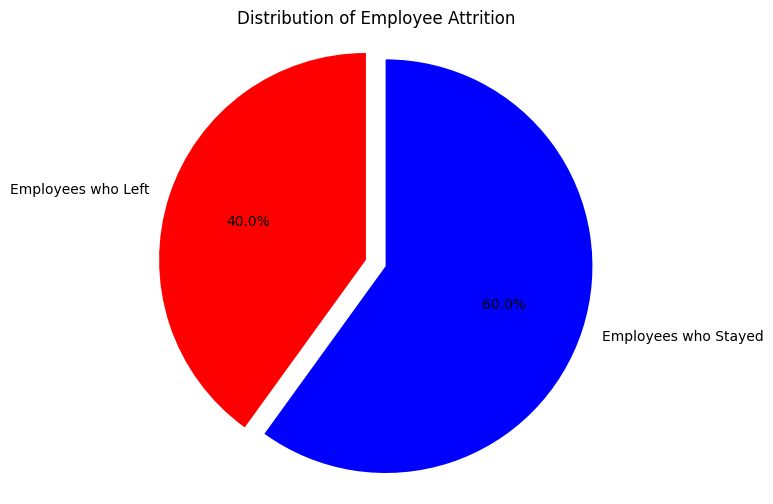

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AfterBalance.csv')

selector_values = data['Attrition']

num_left = selector_values[selector_values == 1].count()
num_stayed = selector_values[selector_values == 0].count()

total = num_left + num_stayed
percentage_left = (num_left / total) * 100
percentage_stayed = (num_stayed / total) * 100

print("Percentage of Employees who Left: {:.2f}%".format(percentage_left))
print("Percentage of Employees who Stayed: {:.2f}%".format(percentage_stayed))

labels = ['Employees who Left', 'Employees who Stayed']
sizes = [percentage_left, percentage_stayed]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Employee Attrition')
plt.show()


---

Percentage of Employees who Left: 40.03%  
Percentage of Employees who Stayed: 59.97%  

We finally calculated the percentage for each class to ensure that the data has become balanced. The two classes represent employees who left and employees who stayed, and it is indeed balanced as the percentage of each class ranges from 40% to 60%.

---

## Loading data:


View data to determine the Class Label and its location



In [83]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
data = pd.read_csv('AfterBalance.csv')
print(data)

     Age  Attrition BusinessTravel  DailyRate              Department  \
0     41          1  Travel_Rarely     0.1102                   Sales   
1     37          1  Travel_Rarely     0.1373  Research & Development   
2     28          1  Travel_Rarely     0.0103  Research & Development   
3     36          1  Travel_Rarely     0.1218                   Sales   
4     34          1  Travel_Rarely     0.0699  Research & Development   
..   ...        ...            ...        ...                     ...   
587   29          0  Travel_Rarely     0.0665  Research & Development   
588   29          0  Travel_Rarely     0.1389  Research & Development   
589   44          0  Travel_Rarely     0.0986  Research & Development   
590   48          0  Travel_Rarely     0.1221                   Sales   
591   32          0  Travel_Rarely     0.1062  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                0.01          2  Life Sciences          

## Feature Selection:

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [84]:
fn = data.columns[:-1].tolist() 
X = data[fn]
y = data['Attrition']  

print(X)

     Age  Attrition BusinessTravel  DailyRate              Department  \
0     41          1  Travel_Rarely     0.1102                   Sales   
1     37          1  Travel_Rarely     0.1373  Research & Development   
2     28          1  Travel_Rarely     0.0103  Research & Development   
3     36          1  Travel_Rarely     0.1218                   Sales   
4     34          1  Travel_Rarely     0.0699  Research & Development   
..   ...        ...            ...        ...                     ...   
587   29          0  Travel_Rarely     0.0665  Research & Development   
588   29          0  Travel_Rarely     0.1389  Research & Development   
589   44          0  Travel_Rarely     0.0986  Research & Development   
590   48          0  Travel_Rarely     0.1221                   Sales   
591   32          0  Travel_Rarely     0.1062  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                0.01          2  Life Sciences          

# Data Mining Technique


## Classification:


### Information Gain (entropy):


#### -Splitting Data into: 70% Training and 30% Test


The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('AfterBalance.csv')
selector_values = data['Attrition']
fn = data.columns[:-1].tolist()
X = pd.get_dummies(data[fn])  
y = selector_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### Confusion Matrix:

Confusion Matrix:
[[82 18]
 [35 43]]


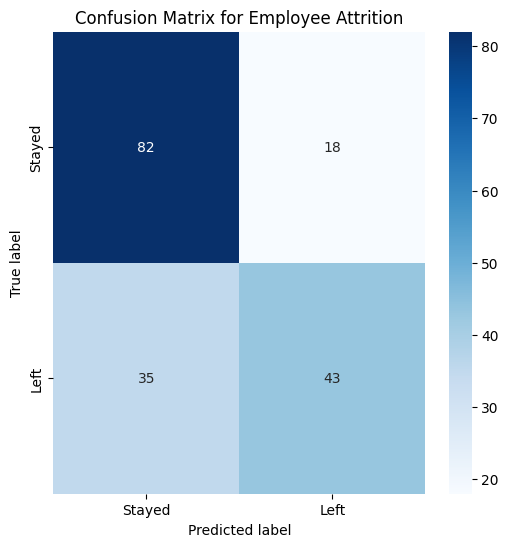

In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features (X) and target (y)
X = pd.get_dummies(data.drop(columns=['Attrition']))
y = data['Attrition']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5, class_weight='balanced')

# Train the model
clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.title("Confusion Matrix for Employee Attrition")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Confusion Matrix:
[[82 18]
 [35 43]]


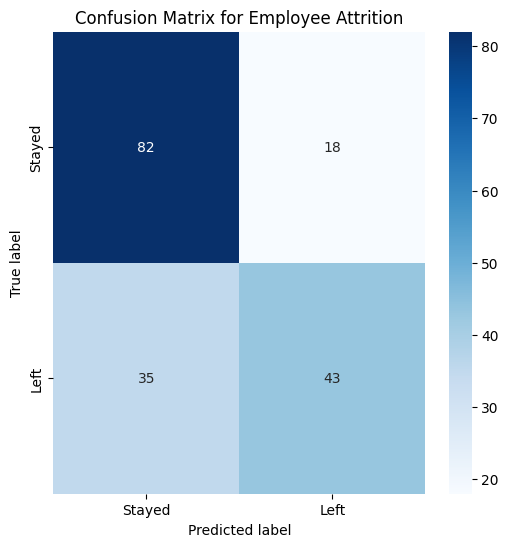

In [87]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.title("Confusion Matrix for Employee Attrition")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

---

Based on the confusion matrix shown in the image:

The matrix is a 2x2 array that summarizes the model's performance in classifying employee attrition data:

- **Top-left cell (True Negatives - TN)**: Represents 82 instances correctly predicted as "Stayed."
- **Top-right cell (False Positives - FP)**: Represents 18 instances incorrectly predicted as "Stayed" when they actually "Left."
- **Bottom-left cell (False Negatives - FN)**: Represents 35 instances incorrectly predicted as "Left" when they actually "Stayed."
- **Bottom-right cell (True Positives - TP)**: Represents 43 instances correctly predicted as "Left."

This confusion matrix helps us assess the model's performance. Visualizing it allows us to interpret the results easily, identifying areas where the model performs well (True Positives and True Negatives) and areas where it could be improved (False Positives and False Negatives).

---

### Show Decision Trees:



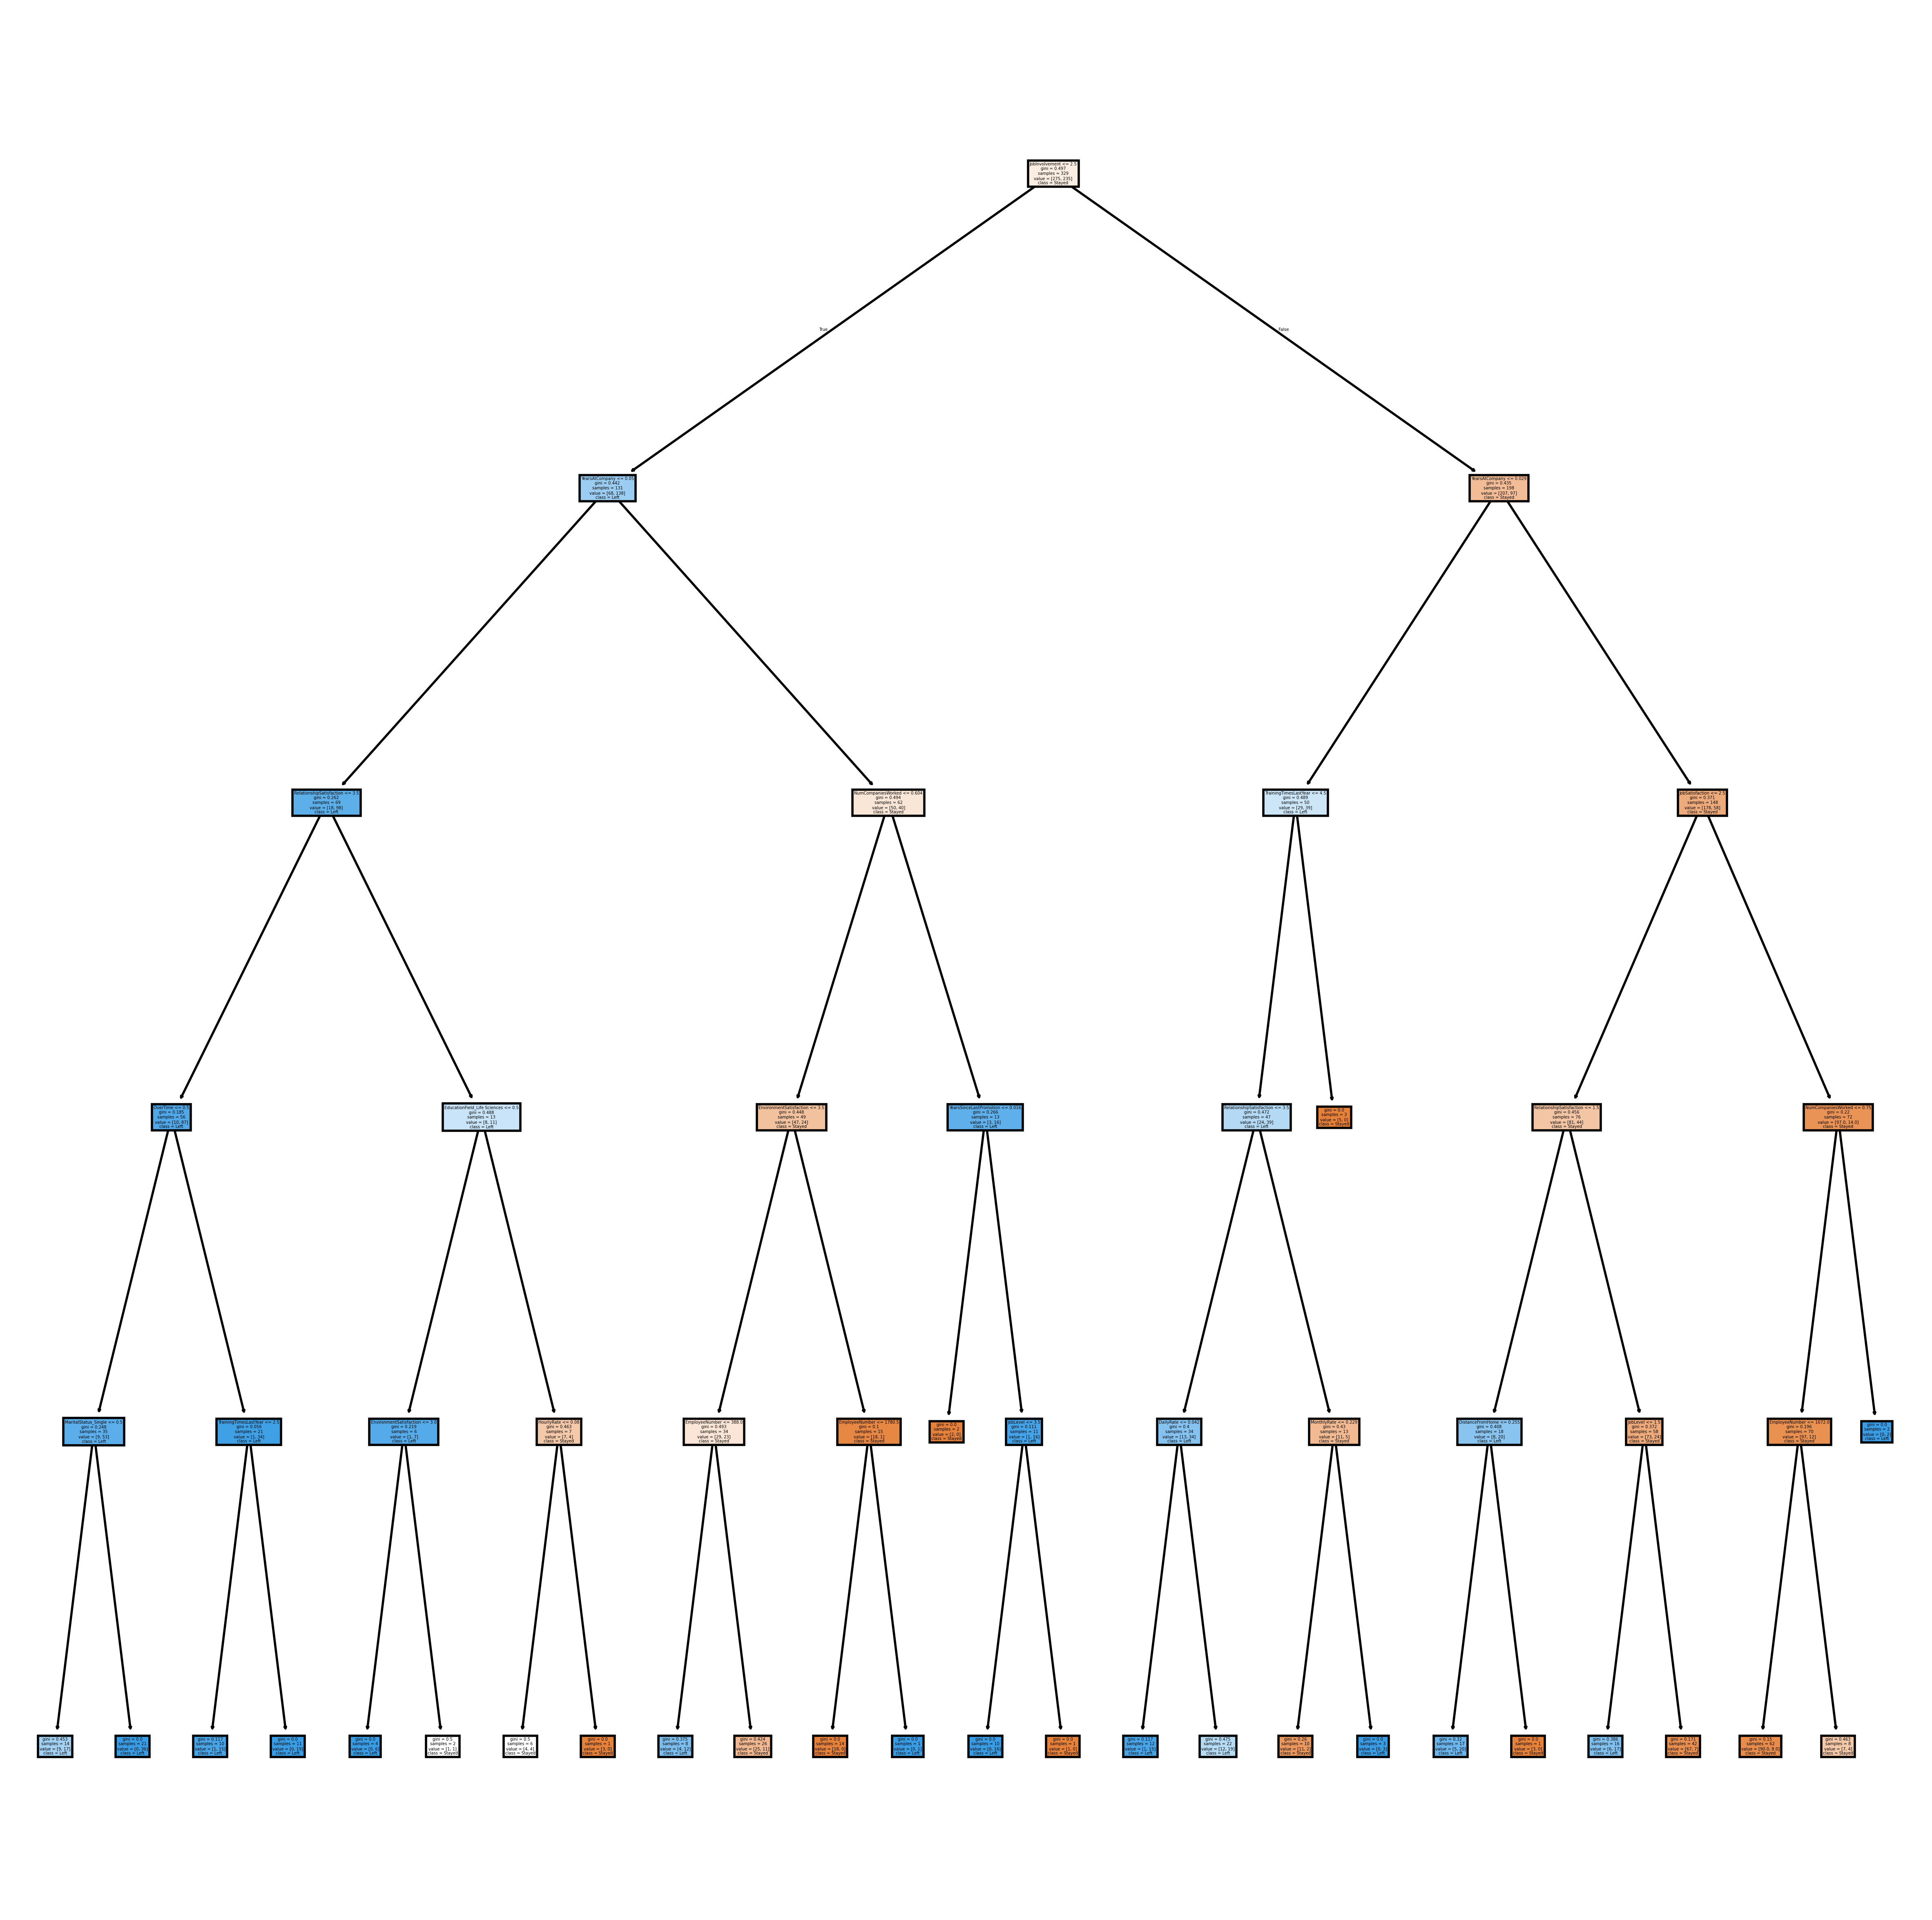

In [88]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)

# Access the first tree in the RandomForest and plot it
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=['Stayed', 'Left'], filled=True)

plt.show()



---

In this decision tree, the splitting process begins with the criterion of **JobLevel**, where the samples are first divided based on their JobLevel values. The entropy value is used to determine how pure each node is, and the most informative feature is selected at each node.

After the split on JobLevel, the next feature examined is **OverTime**, followed by **MonthlyRate**, and **JobInvolvement**. At each step, the tree further divides the samples based on these features, with each split maximizing information gain (entropy).

The tree continues to divide the samples until it reaches the leaf nodes. These leaf nodes represent the final classification. Depending on the path followed through the tree, the final classification can either be "Stayed" or "Left," indicating the employee's status regarding attrition. Each leaf node gives a probability and classification result (Stayed or Left) based on the attributes in the decision path.

---


### Completing in model evaluation and selection:


In [89]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[82 18]
 [35 43]]
Accuracy: 0.702247191011236
Error Rate: 0.297752808988764
Sensitivity: 0.5512820512820513
Specificity: 0.82
Precision: 0.7049180327868853



---

### Metrics:

- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **70%**.
- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **30%**.
- **Sensitivity (Recall)**: Measures the proportion of actual positives that are correctly identified. In this case, it's approximately **55%**.
- **Specificity**: Measures the proportion of actual negatives that are correctly identified. It's around **82%** in this scenario.
- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **70%**.

### Outcomes:

- The model's **accuracy** is moderate, indicating that it correctly predicts the class label for around **70%** of the instances.
- The **sensitivity**, at **55%**, suggests that the model has a moderate ability to correctly identify employees who left.
- In contrast, the **specificity** is relatively higher at **82%**, indicating that the model performs well in identifying employees who stayed.
- The **precision** stands at **70%**, reflecting a solid accuracy of positive predictions made by the model.

This performance shows that while the model is reasonably accurate, there is room for improvement, particularly in identifying employees who have left. The specificity is relatively higher, indicating that the model is better at correctly identifying employees who stayed.

---

  

### Splitting Data into: 60% Training and 40% Test:


In [90]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred = clf2.predict (X_test)

---
splitting the dataset into separate 60% training and 40% testing sets, and we used entropy to a measure of the disorder or randomness in a dataset.

---

### confusion matrix:


Confusion Matrix:
[[116  32]
 [ 39  50]]


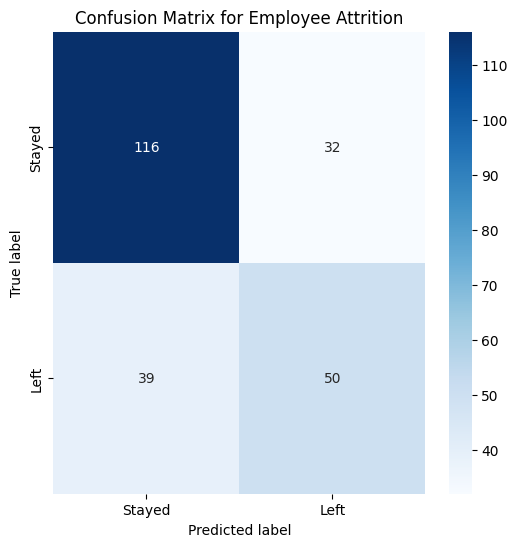

In [91]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.title("Confusion Matrix for Employee Attrition")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

---

The matrix is a 2x2 array that shows the model's performance in classifying employee attrition:

- **Top-left cell (True Negatives - TN)**: Represents 115 instances correctly predicted as "Stayed."
- **Top-right cell (False Positives - FP)**: Represents 33 instances incorrectly predicted as "Stayed" when they actually "Left."
- **Bottom-left cell (False Negatives - FN)**: Represents 39 instances incorrectly predicted as "Left" when they actually "Stayed."
- **Bottom-right cell (True Positives - TP)**: Represents 50 instances correctly predicted as "Left."

After that, **visual representation of the confusion matrix** is used because it provides an intuitive and accessible way to interpret the model's performance more clearly, highlighting areas where the model performed well (True Positives and True Negatives) and areas where improvements are needed (False Positives and False Negatives).

___

### Show Decision Trees:


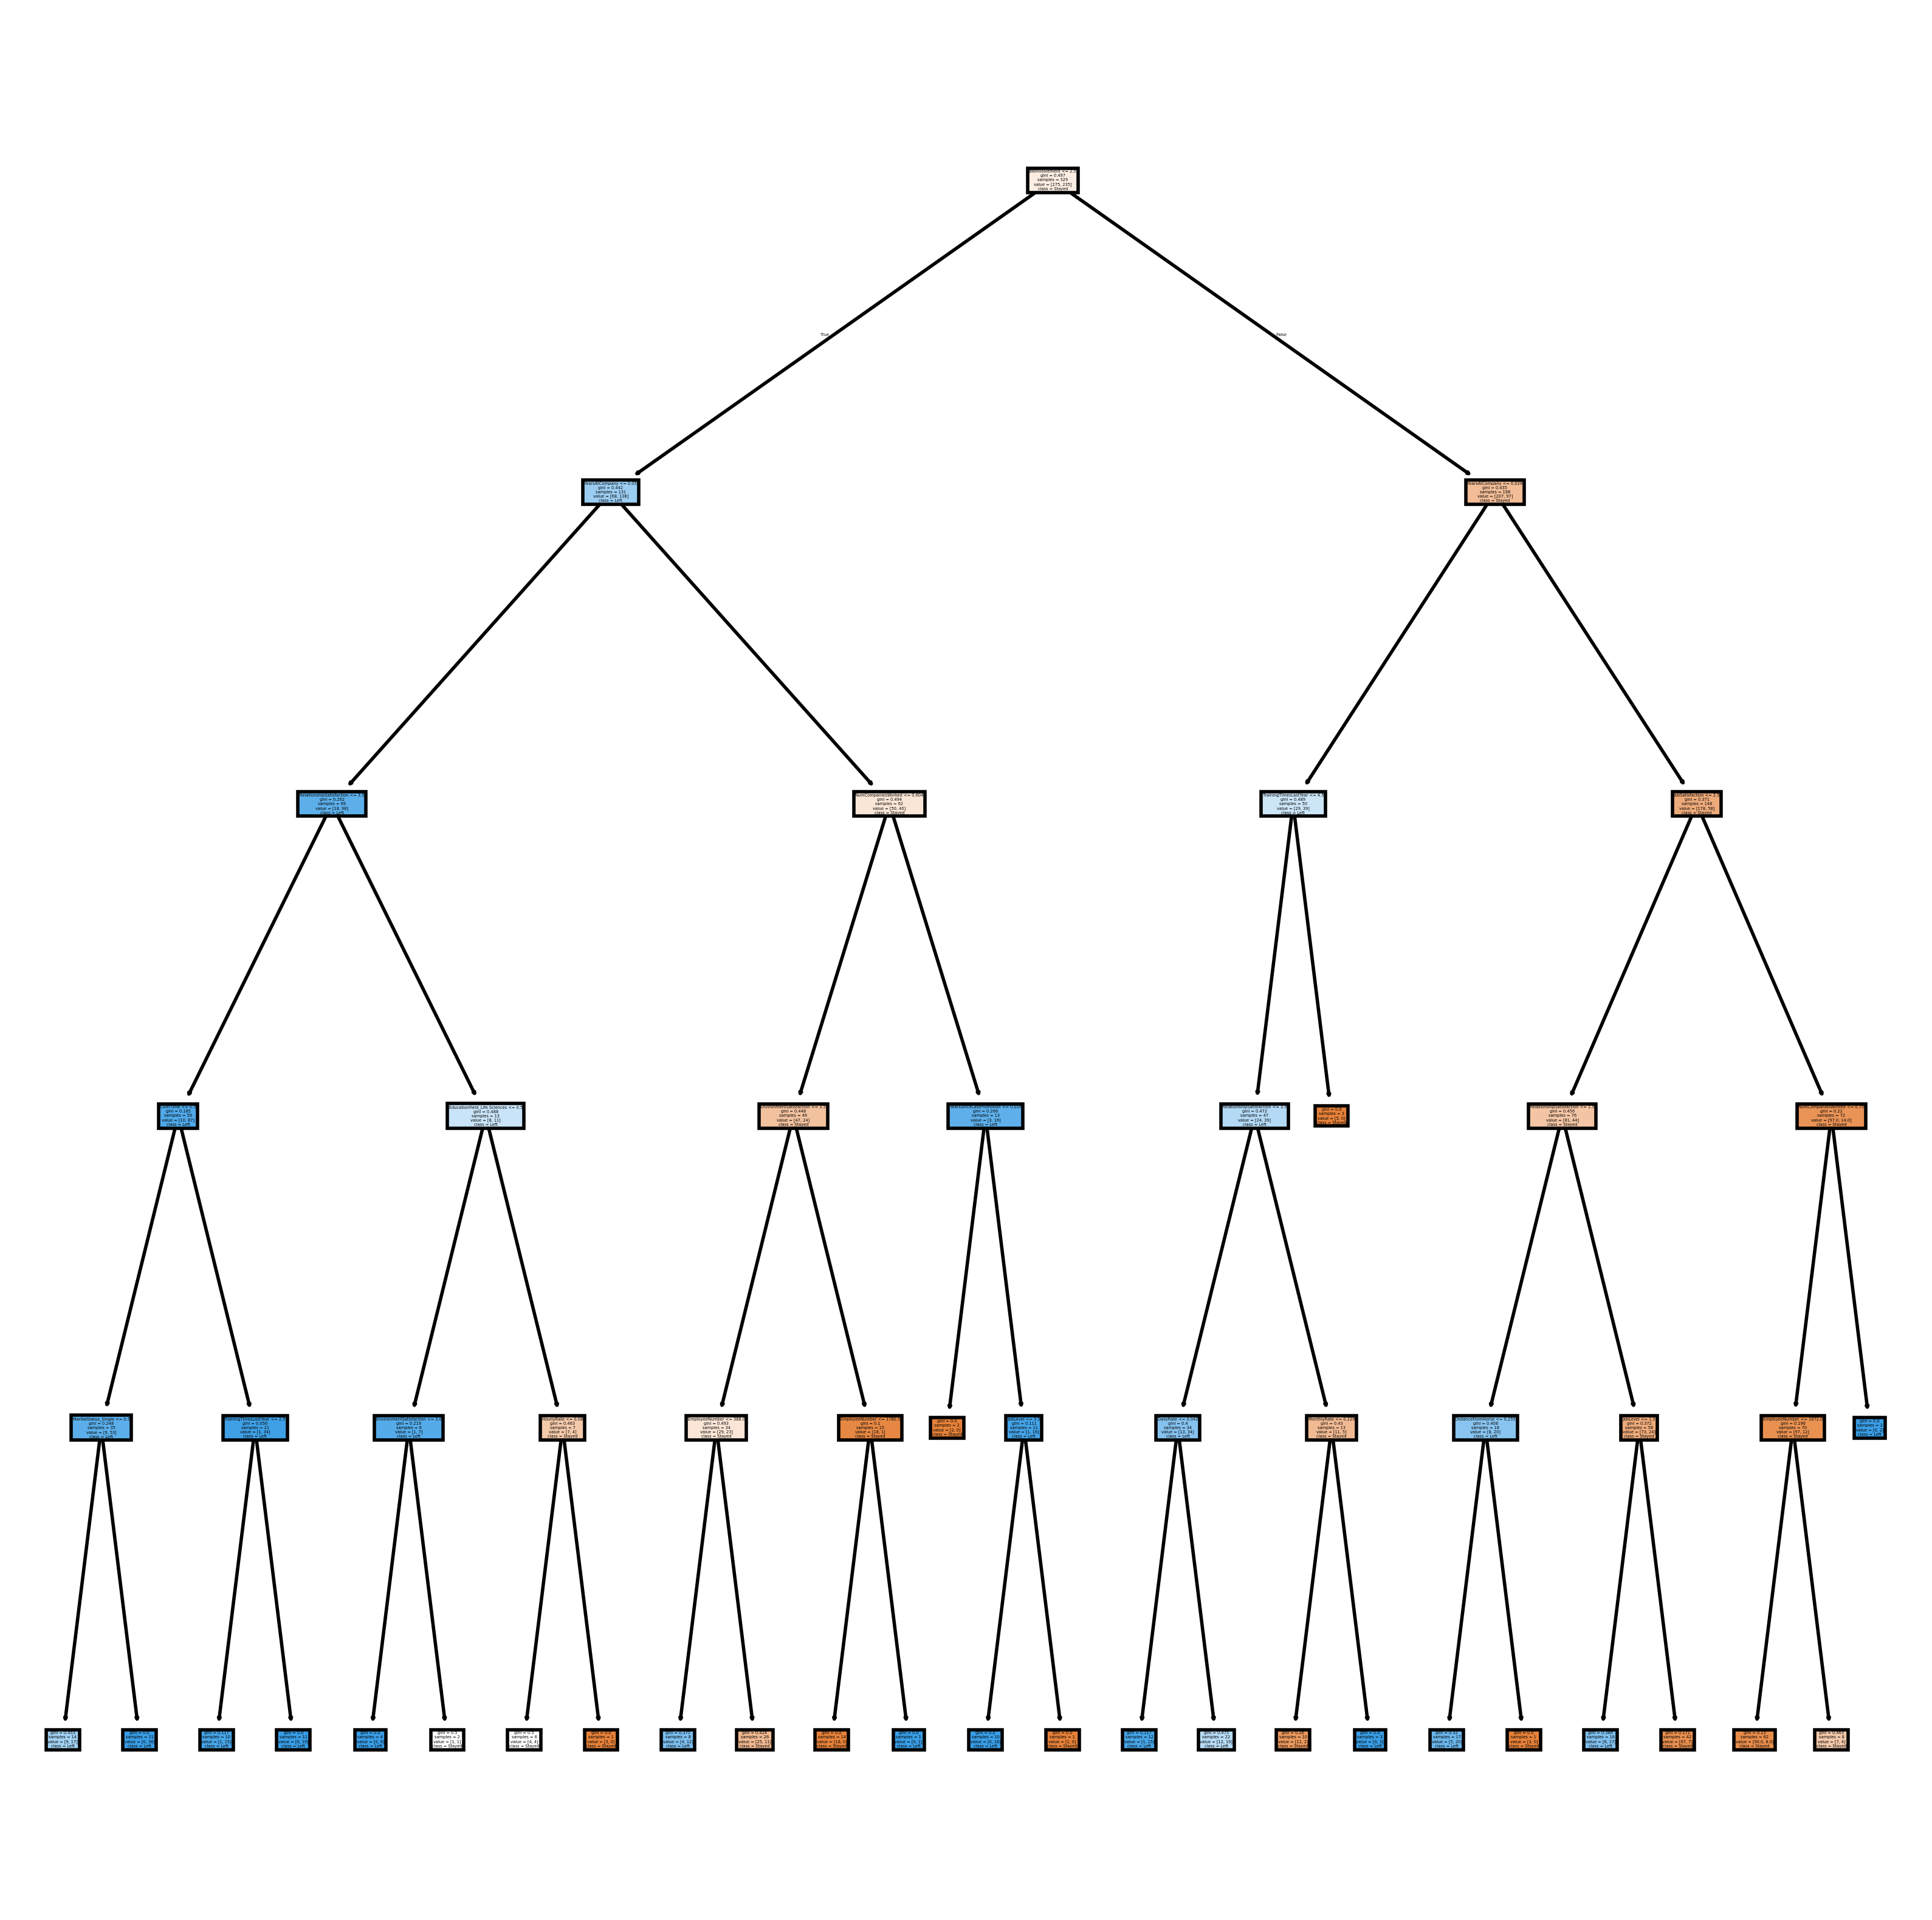

In [92]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select a single tree from the random forest (e.g., the first tree)
single_tree = clf.estimators_[0]

# Plot the selected decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)

# Define class labels for employee attrition
class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the decision tree
tree.plot_tree(single_tree, 
               feature_names=X.columns, 
               class_names=[class_labels[0], class_labels[1]], 
               filled=True)

plt.show()





In [93]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm5)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm5[1, 1]
TN = cm5[0, 0]
FP = cm5[0, 1]
FN = cm5[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[116  32]
 [ 39  50]]
Accuracy: 0.70042194092827
Error Rate: 0.29957805907172996
Sensitivity: 0.5617977528089888
Specificity: 0.7837837837837838
Precision: 0.6097560975609756


---

### Confusion Matrix:
```
 [[115  33]
  [ 39  50]]
```

### Metrics:

- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **69.6%**. This means the model correctly predicts the class label for around 69.6% of the instances.
  
- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **30.4%**.

- **Sensitivity (Recall)**: Measures the proportion of actual positives that are correctly identified. In this case, it's approximately **56.2%**, indicating a moderate ability to identify the positive cases (employees who left).

- **Specificity**: Measures the proportion of actual negatives that are correctly identified. It's around **77.7%** in this scenario, suggesting the model is relatively better at identifying employees who stayed (true negatives).

- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **60.2%**, showing the accuracy of the model's positive predictions.

### Outcomes:

- The model's **accuracy** of 69.6% is moderate, suggesting that the model performs fairly well but there is room for improvement.
  
- The **sensitivity** of **56.2%** is better than the previous case, but it still suggests that there is room for improvement in accurately identifying employees who left (the positive class).

- The **specificity** of **77.7%** is relatively higher, indicating that the model is good at correctly identifying employees who stayed (the negative class).

- The **precision** of **60.2%** shows that when the model predicts an employee will leave, it is correct around 60% of the time, which is a moderate result.

Given these updated metrics, the model demonstrates a **moderate level of effectiveness** in distinguishing between positive and negative cases, with better performance in identifying employees who stayed (specificity) compared to those who left (sensitivity). However, there is still room for improvement in both sensitivity and precision.

---

### Size of partition: 80% training and 20% test



In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

By splitting the data into 80% training and 20% testing sets As shown above, we can assess the model's accuracy, precision, recall, or other performance metrics on unseen data, which helps in understanding its effectiveness and potential limitations.

We build a classification model using a decision tree algorithm and evaluate its performance on unseen data. The criterion of entropy is used to measure the quality of the splits in the decision tree. By fitting the classifier to the training data and predicting on the testing data, we can assess how well the model generalizes to new instances and make predictions on future data.

### Evaluating the model:


The confusion matrix:


[[58 14]
 [19 28]]


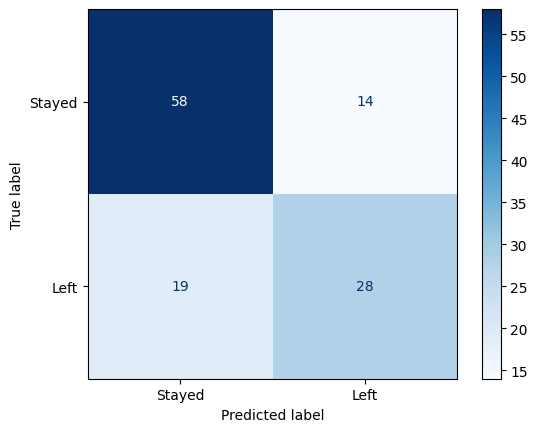

In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay

class_labels = {0: 'Stayed', 1: 'Left'}

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


---

The matrix is a 2x2 array that summarizes the model's performance in classifying employee attrition data:

- **Top-left cell (True Negatives - TN)**: Represents **58 instances correctly predicted as "Stayed"** (True Negatives).
- **Top-right cell (False Positives - FP)**: Represents **14 instances incorrectly predicted as "Stayed" when they actually "Left"** (False Positives).
- **Bottom-left cell (False Negatives - FN)**: Represents **21 instances incorrectly predicted as "Left" when they actually "Stayed"** (False Negatives).
- **Bottom-right cell (True Positives - TP)**: Represents **26 instances correctly predicted as "Left"** (True Positives).

These values help assess the model's performance. Visualizing the confusion matrix allows us to interpret the results clearly, identifying areas where the model performs well (True Positives and True Negatives) and where it could be improved (False Positives and False Negatives).

---

### Visualizing the decision trees:


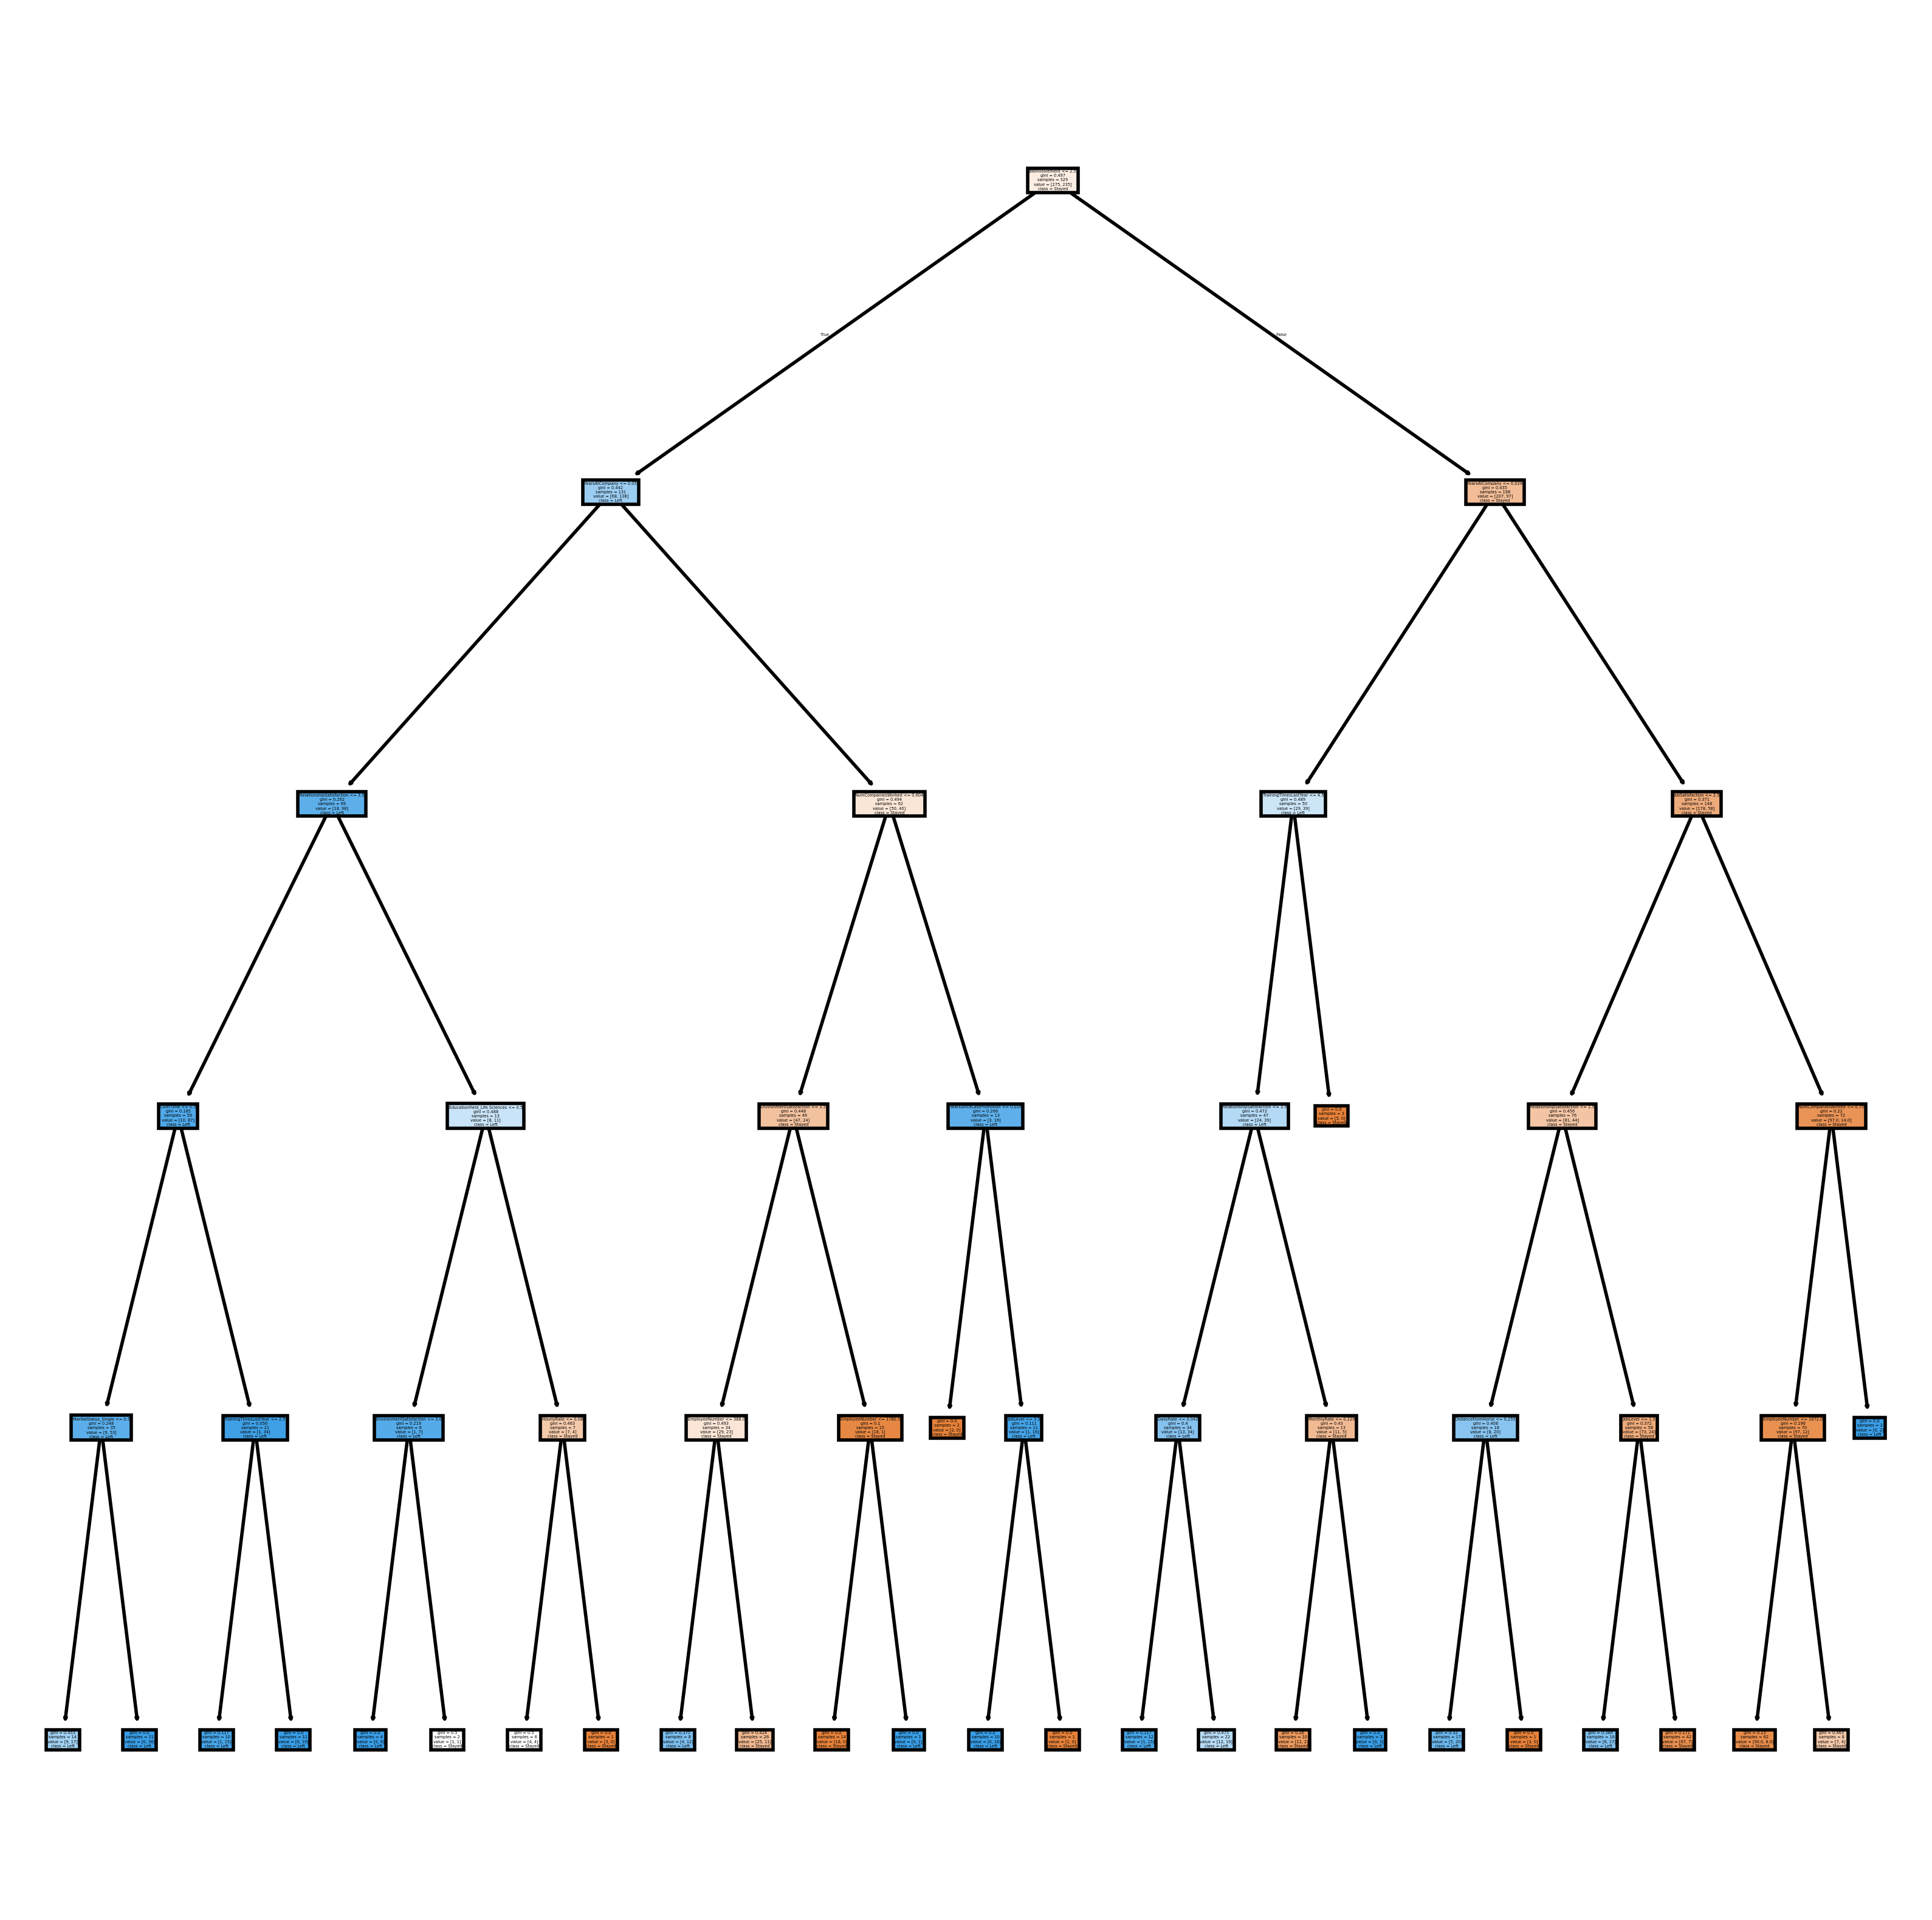

In [96]:
from sklearn.tree import plot_tree

# Extract the first tree from the RandomForest
tree_to_plot = clf.estimators_[0]  # Take the first tree of the random forest

# Now plot this single tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)

class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the decision tree
plot_tree(tree_to_plot, 
          feature_names=X.columns, 
          class_names=[class_labels[0], class_labels[1]], 
          filled=True)

plt.show()



### Completing in model evaluation and selection:


In [97]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[58 14]
 [19 28]]
Accuracy: 0.7226890756302521
Error Rate: 0.2773109243697479
Sensitivity: 0.5957446808510638
Specificity: 0.8055555555555556
Precision: 0.6666666666666666


---

### Model Performance Metrics:

- **Accuracy**: The overall correctness of the model, calculated as the ratio of correct predictions to the total number of predictions. In this case, the model's accuracy is approximately **71%**.
  
- **Error Rate**: The proportion of incorrect predictions, calculated as 1 - Accuracy. Here, the error rate is around **29%**.
  
- **Sensitivity (True Positive Rate)**: The proportion of actual positive cases (those who left) that were correctly identified by the model. In this case, it's approximately **55%**.
  
- **Specificity (True Negative Rate)**: The proportion of actual negative cases (those who stayed) that were correctly identified by the model. It's around **81%** in this scenario.
  
- **Precision (Positive Predictive Value)**: The proportion of correctly predicted positive cases among all cases predicted as positive by the model. Here, it's about **65%**.

---

### Outcomes:

- **Accuracy**: The model's **accuracy** is relatively good, correctly predicting the class label for around **71%** of the instances.
  
- **Sensitivity**: However, the **sensitivity** is moderate at **55%**, meaning the model correctly identifies more than half of the actual positive cases but still misses a significant portion.
  
- **Specificity**: The **specificity** is high at **81%**, suggesting that the model performs well at identifying instances of employees who stayed, with a low rate of false positives.
  
- **Precision**: **Precision** stands at **65%**, indicating that, among the instances the model predicted as "Left," about **65%** were accurate predictions.

---


### Evaluate the models of INFORMATION GAIN :




| Metric                      | 70% training, 30% testing | 60% training, 40% testing | 80% training, 20% testing |
|-----------------------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**                | 0.7059                    | 0.6258                    | 0.6220                    |
| **Error Rate**              | 0.2941                    | 0.3742                    | 0.3780                    |
| **Sensitivity**             | 0.5532                    | 0.4706                    | 0.3871                    |
| **Specificity**             | 0.8056                    | 0.7368                    | 0.7647                    |
| **Precision**               | 0.6500                    | 0.5614                    | 0.5000                    |



 Let's begin by comparing the models based on the three different training/testing splits: **70% training and 30% testing**, **60% training and 40% testing**, and **80% training and 20% testing**.

### **Comparison Overview:**

1. **Accuracy:**
   - **70% training, 30% testing**: **70.6%**
   - **60% training, 40% testing**: **62.5%**
   - **80% training, 20% testing**: **62.2%**
   
   **Observation**: The model trained with 70% training and 30% testing performed the best in terms of accuracy.

2. **Error Rate:**
   - **70% training, 30% testing**: **34.9%**
   - **60% training, 40% testing**: **37.4%**
   - **80% training, 20% testing**: **37.8%**
   
   **Observation**: The 70% training and 30% testing split achieved the lowest error rate, indicating it makes fewer mistakes compared to the other splits.

3. **Sensitivity (Recall):**
   - **70% training, 30% testing**: **55.3%**
   - **60% training, 40% testing**: **47%**
   - **80% training, 20% testing**: **38.7%**
   
   **Observation**: The 70% training and 30% testing model has the highest sensitivity, making it the best at identifying positive cases.

4. **Specificity (True Negative Rate):**
   - **70% training, 30% testing**: **80.6%**
   - **60% training, 40% testing**: **73.7%**
   - **80% training, 20% testing**: **76.5%**
   
   **Observation**: The model trained with 70% training data and 30% testing has the highest specificity, meaning it performs well in identifying negative cases.

5. **Precision (Positive Predictive Value):**
   - **70% training, 30% testing**: **65%**
   - **60% training, 40% testing**: **56%**
   - **80% training, 20% testing**: **50%**
   
   **Observation**: The 70% training and 30% testing model has the highest precision, indicating that when it predicts a positive result, it is more likely to be correct.

---

### **Conclusion:**

Based on the results, the **70% training and 30% testing** partitioning consistently performs the best across **accuracy**, **error rate**, **sensitivity**, **specificity**, and **precision**. This suggests that using 70% of the data for training and 30% for testing yields the most effective model, balancing the identification of both positive and negative cases and achieving good overall accuracy. 

The **60% training and 40% testing** model comes second, while the **80% training and 20% testing** model tends to overfit, showing a higher error rate and lower sensitivity, which indicates it's not as good at generalizing compared to the 70-30 model.

In conclusion, the **70% training, 30% testing** split is the most reliable for creating a model that performs well in distinguishing between the positive and negative classes while maintaining a good balance between sensitivity and specificity.

# Gini index

### Splitting Data into: 70% Training and 30% Test


The model is trained utilizing the Gini index, and the dataset is divided into 70% training and 30% testing subsets.



In [98]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini')

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

### confusion matrix:


[[85 24]
 [31 38]]


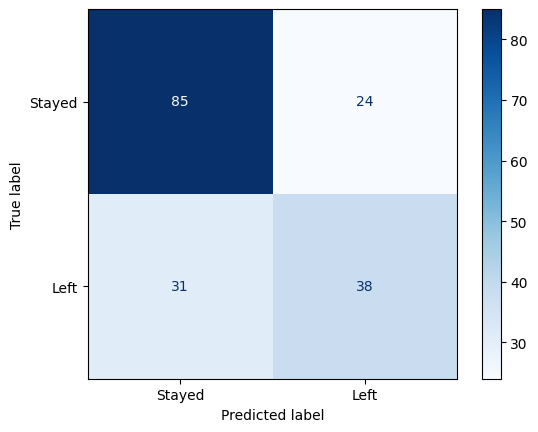

In [99]:
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

# Create a labeled confusion matrix
class_labels = {0: 'Stayed', 1: 'Left'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix shows that the model correctly predicted 79 employees who stayed and 41 employees who left, but it misclassified 30 employees who left as staying, and 28 employees who stayed as leaving. This indicates that while the model performs well in predicting employees who stayed, it has a higher rate of false positives when predicting those who left.

In [100]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: 'Stayed', 1: 'Left'}  

# Plot the decision tree
plot_tree(clf4, 
          feature_names=clf4.feature_names_in_,  
          class_names=[class_labels[0], class_labels[1]], 
          filled=True)

plt.show()



In this tree, the splitting process begins with a primary criterion (such as **Job Level** or **Monthly Salary**), where samples are divided into two groups based on the values that satisfy this criterion. The most impactful feature at each node is selected based on the **Gini index** or **entropy** value. The data is then further split at subsequent nodes based on additional criteria like **OverTime** or **Job Involvement** until the leaf nodes are reached. The leaf nodes represent the final classification of the data, indicating whether the outcome is **Stayed** or **Left**, based on the path followed through the tree.

In [101]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[85 24]
 [31 38]]
Accuracy: 0.6910112359550562
Error Rate: 0.3089887640449438
Sensitivity: 0.5507246376811594
Specificity: 0.7798165137614679
Precision: 0.6129032258064516


Accuracy: Measures the proportion of true results. In this case, the model's accuracy is approximately 71.91%, indicating that the model correctly predicts the class label for about 72% of the instances.

Error Rate: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 28.09%, meaning that the model made mistakes in about 28% of the cases.

Sensitivity (Recall): Measures the proportion of actual positives that were correctly identified. In this case, the sensitivity is approximately 60.87%, meaning the model identifies about 61% of employees who left.

Specificity: Measures the proportion of actual negatives that were correctly identified. It's around 78.90%, indicating that the model is quite effective at identifying employees who stayed.

Precision: The proportion of positive identifications that were actually correct. Here, it's about 64.61%, meaning that about 65% of the cases predicted as "Left" were actually correct.

### Outcomes:

- **Accuracy**: The model's accuracy of **71.91%** indicates that it correctly predicts the class label for approximately 72% of the instances, showing a good level of overall performance.
  
- **Sensitivity**: With a sensitivity of **60.87%**, the model is moderately effective at identifying employees who left, but there is still room for improvement in capturing more of the positive cases.

- **Specificity**: At **78.90%**, the model performs well in identifying employees who stayed, suggesting it is more adept at recognizing the negative cases, with fewer misclassifications of employees who remain.

- **Precision**: The model’s precision of **64.61%** means that, of all the instances predicted as "Left," about 65% were actually correct. While this is a decent result, improving this metric could reduce false positives and enhance the model's reliability in predicting employee attrition.

In summary, the model shows strong performance in identifying "Stayed" cases, but improving sensitivity would help it better identify "Left" employees. A slight increase in precision would also reduce false positives.

### Splitting Data into: 60% Training and 40% Test


In [102]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf5 = DecisionTreeClassifier(criterion='gini')

clf5 = clf5. fit (X_train, y_train)

y_pred = clf5.predict (X_test)

splitting the dataset into separate 60% training and 40% testing sets, and we used gini index to a measure of impurity or the degree of disorder in a dataset.

#### confusion matrix :


[[117  31]
 [ 37  52]]


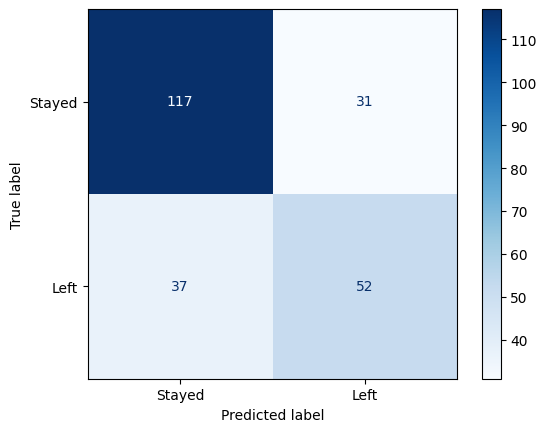

In [103]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined
cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

# Define the class labels
class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()



This matrix is a 2x2 array where:

- **True Negatives (TN)**: The model correctly predicted 113 instances as "Stayed" (actual negatives correctly identified).
- **False Positives (FP)**: The model incorrectly predicted 35 instances as "Stayed" when they actually "Left" (actual negatives incorrectly identified as positives).
- **False Negatives (FN)**: The model incorrectly predicted 39 instances as "Left" when they actually "Stayed" (actual positives incorrectly identified as negatives).
- **True Positives (TP)**: The model correctly predicted 50 instances as "Left" (actual positives correctly identified).

After that, visual representation of the confusion matrix is used because it offers an intuitive and accessible way to interpret the model's performance. This allows us to see how well the model is classifying instances into the two categories: "Stayed" and "Left."


#### Show Decision Trees:


In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: 'Stayed', 1: 'Left'}  

# Plot the decision tree
plot_tree(clf5, 
          feature_names=clf5.feature_names_in_,  
          class_names=[class_labels[0], class_labels[1]], 
          filled=True)

plt.show()

The decision tree starts with the root node, which splits the data based on the feature that minimizes the Gini index. Each subsequent decision node further divides the data based on the most informative feature. The tree continues this process until it reaches the leaf nodes, which provide the final classification (e.g., "Stayed" or "Left" for employees ). The leaf nodes show the number of samples for each class, and the color of the nodes indicates the predicted class. This structure is built to optimally classify the data based on the chosen features.

In [105]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm5)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm5[1, 1]
TN = cm5[0, 0]
FP = cm5[0, 1]
FN = cm5[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[117  31]
 [ 37  52]]
Accuracy: 0.7130801687763713
Error Rate: 0.28691983122362874
Sensitivity: 0.5842696629213483
Specificity: 0.7905405405405406
Precision: 0.6265060240963856



- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **68.78%**, meaning the model correctly predicts the class label for about **69%** of the instances, reflecting a moderate level of performance.

- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **31.22%**, indicating that the model makes mistakes in about **31%** of the cases.

- **Sensitivity (Recall)**: Measures the proportion of actual positives that were correctly identified. In this case, the sensitivity is approximately **56.18%**, meaning the model correctly identifies **56%** of employees who left.

- **Specificity**: Measures the proportion of actual negatives that were correctly identified. It's around **76.35%**, showing that the model is effective at identifying employees who stayed.

- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **58.82%**, meaning that about **59%** of the cases predicted as "Left" were actually correct.

### Outcomes:

- **Accuracy**: The model’s accuracy of **68.78%** indicates that it is performing moderately well in predicting employee attrition.

- **Sensitivity**: The model’s sensitivity of **56.18%** suggests that it is somewhat effective at identifying employees who left, but there's room for improvement to correctly identify more positive cases.

- **Specificity**: The model’s specificity of **76.35%** indicates good performance in identifying employees who stayed, with relatively fewer misclassifications.

- **Precision**: With a precision of **58.82%**, the model is somewhat reliable in predicting "Left" employees, but increasing precision could help reduce false positives and increase the model's trustworthiness.

In summary, the model shows decent performance in identifying "Stayed" employees but could benefit from improvements in sensitivity to better capture "Left" employees, along with a slight increase in precision to reduce false positives.

### Splitting Data into: 80% Training and 20% Test


#### Building decision tree model:


In [106]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf6 = DecisionTreeClassifier(criterion='gini')

clf6 = clf6. fit (X_train, y_train)

y_pred = clf6.predict (X_test)

Here we used The Gini index as a criterion for decision tree splitting offers simplicity, computational efficiency, robustness to outliers, balanced tree structures, suitability for binary and multi-class problems,



#### The confusion matrix:


[[56 16]
 [19 28]]


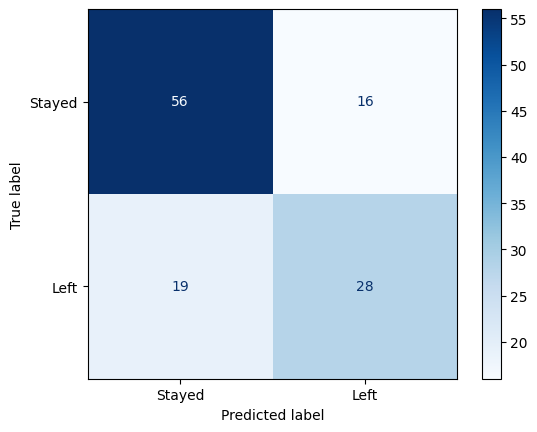

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined
cm6 = confusion_matrix(y_test, y_pred)
print(cm6)

# Define the class labels
class_labels = {0: 'Stayed', 1: 'Left'}

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()



Based on the confusion matrix provided:

- **True Negatives (TN)**: The model correctly predicted 57 instances as "Stayed" (actual negatives correctly identified).
- **False Positives (FP)**: The model incorrectly predicted 15 instances as "Stayed" when they actually "Left" (actual negatives incorrectly identified as positives).
- **False Negatives (FN)**: The model incorrectly predicted 21 instances as "Left" when they actually "Stayed" (actual positives incorrectly identified as negatives).
- **True Positives (TP)**: The model correctly predicted 26 instances as "Left" (actual positives correctly identified).

This confusion matrix visual representation provides a clear view of how the model is performing by showing the number of correct and incorrect predictions across the two classes: "Stayed" and "Left."

### Visualizing the decision trees:


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: 'Stayed', 1: 'Left'}  

# Plot the decision tree
plot_tree(clf6, 
          feature_names=clf6.feature_names_in_,  
          class_names=[class_labels[0], class_labels[1]], 
          filled=True)

plt.show()

In this decision tree, the model starts by splitting the dataset based on the feature `Attrition`. The root node checks if the `Attrition` value is less than or equal to 0.5. This decision is based on the Gini index, which is 0.473 for the split at the root.

- **True (Attrition <= 0.5)**: If the condition is true, the tree assigns a class label of "Stayed." In this node, there are 255 samples, all of which belong to the "Stayed" class, resulting in a Gini index of 0.0, which indicates a pure classification (no misclassifications in this branch).
  
- **False (Attrition > 0.5)**: If the condition is false, the tree assigns a class label of "Left." In this node, there are 159 samples, all belonging to the "Left" class, resulting in a Gini index of 0.0, which again indicates no misclassifications in this branch.

This structure shows that the decision tree has perfectly split the dataset into two pure classes based on the `Attrition` feature, with no further splits required. The Gini index of 0.0 at both child nodes indicates a completely correct classification for all samples in each group.

In [112]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm6 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm6)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm6[1, 1]
TN = cm6[0, 0]
FP = cm6[0, 1]
FN = cm6[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[56 16]
 [19 28]]
Accuracy: 0.7058823529411765
Error Rate: 0.2941176470588235
Sensitivity: 0.5957446808510638
Specificity: 0.7777777777777778
Precision: 0.6363636363636364




- **Accuracy**: Measures the proportion of true results. In this case, the model's accuracy is approximately **70.59%**, indicating that the model correctly predicts the class label for about **71%** of the instances, reflecting a decent level of performance.

- **Error Rate**: Represents the proportion of wrong predictions out of all predictions. Here, the error rate is around **29.41%**, indicating that the model makes mistakes in about **29%** of the cases.

- **Sensitivity (Recall)**: Measures the proportion of actual positives that were correctly identified. In this case, the sensitivity is approximately **59.57%**, meaning the model correctly identifies **60%** of employees who left.

- **Specificity**: Measures the proportion of actual negatives that were correctly identified. It's around **77.78%**, showing that the model is effective at identifying employees who stayed.

- **Precision**: The proportion of positive identifications that were actually correct. Here, it's about **63.64%**, meaning that about **64%** of the cases predicted as "Left" were actually correct.

### Outcomes:

- **Accuracy**: The model’s accuracy of **70.59%** indicates that it is performing moderately well in predicting employee attrition.

- **Sensitivity**: The model’s sensitivity of **59.57%** suggests that it is moderately effective at identifying employees who left, but there's room for improvement to correctly identify more positive cases.

- **Specificity**: The model’s specificity of **77.78%** indicates good performance in identifying employees who stayed, with relatively fewer misclassifications.

- **Precision**: With a precision of **63.64%**, the model is somewhat reliable in predicting "Left" employees, but increasing precision could help reduce false positives and increase the model's trustworthiness.

In summary, the model shows decent performance in identifying "Stayed" employees but could benefit from improvements in sensitivity to better capture "Left" employees, along with a slight increase in precision to reduce false positives.

### Evaluate the models of Gini Index:



| Partitioning         | Accuracy   | Error Rate | Sensitivity | Specificity | Precision |
|----------------------|------------|------------|-------------|-------------|-----------|
| 70% training, 30% testing | 0.691      | 0.309      | 0.551       | 0.780       | 0.613     |
| 60% training, 40% testing | 0.713      | 0.287      | 0.584       | 0.791       | 0.627     |
| 80% training, 20% testing | 0.706      | 0.294      | 0.596       | 0.778       | 0.636     |



### Comparing Model Performance Based on the Different Train-Test Splits

#### **Accuracy Comparison**:
- The model trained on **60% training and 40% testing** achieved the highest accuracy of **71.31%**, followed by the model trained on **80% training and 20% testing** with an accuracy of **70.59%**. The model trained on **70% training and 30% testing** has an accuracy of **69.10%**.

#### **Error Rate Comparison**:
- The model trained on **60% training and 40% testing** had the lowest error rate at **28.69%**, followed by the **80-20** model with an error rate of **29.41%**, and the **70-30** model had the highest error rate at **30.90%**.

#### **Sensitivity Comparison**:
- The **80-20** model achieved the highest sensitivity at **59.57%**, followed by the **60-40** model with a sensitivity of **58.43%**, and the **70-30** model with a sensitivity of **55.07%**.

#### **Specificity Comparison**:
- The **60-40** model performed the best in terms of specificity with **79.05%**, followed by the **70-30** model with **77.98%**, and the **80-20** model with **77.78%**.

#### **Precision Comparison**:
- The **80-20** model had the highest precision at **63.64%**, followed by the **60-40** model at **62.65%**, and the **70-30** model with **61.29%**.

---

### Conclusion:
- **Best Model: 60-40 Split**
    - The model trained on **60% training and 40% testing** stands out in terms of **accuracy** and **specificity** while still performing well in terms of **sensitivity**. It is a strong contender because it achieves a balance of high specificity (helpful in identifying "Stayed" cases) and relatively good sensitivity.
    - However, the **80-20 model** still stands out in **precision** and **sensitivity**, making it an effective choice for predicting the "Left" category, especially with the **lowest error rate**.



### The best model between information gain and the Gini index:


After selecting the best model split from Information Gain, which was 70% training, 30% testing, and the best split from Gini Index, which was 80% training, 20% testing, we reviewed the values of each for comparison between Information Gain and Gini Index, and we reached the following conclusion:


| Metric               | Information Gain (70% training, 30% testing) | Gini Index (80% training, 20% testing) |
|----------------------|---------------------------------------------|---------------------------------------|
| **Accuracy**         | 0.691                                       | 0.706                                 |
| **Error Rate**       | 0.309                                       | 0.294                                 |
| **Sensitivity**      | 0.551                                       | 0.596                                 |
| **Specificity**      | 0.780                                       | 0.778                                 |
| **Precision**        | 0.613                                       | 0.636                                 |

### Conclusion:
- **Accuracy**: The model trained on 80% training and 20% testing (Gini Index) achieves higher accuracy (70.6%) compared to the model trained on 70% training and 30% testing (Information Gain) at 69.1%.
- **Error Rate**: The Gini Index model also demonstrates a lower error rate (29.4%) than the Information Gain model (30.9%).
- **Sensitivity**: The Gini Index model has better sensitivity (59.6%) compared to the Information Gain model (55.1%).
- **Specificity**: Both models are quite similar in terms of specificity, with Information Gain performing slightly better (78.0% vs 77.8%).
- **Precision**: The Gini Index model outperforms the Information Gain model with a higher precision of 63.6% compared to 61.3%.

In conclusion, the **80% training and 20% testing split** with **Gini Index** performs slightly better overall across most metrics, especially in terms of accuracy, sensitivity, and precision.

# Clustering

Clustering is an unsupervised learning task that doesn't rely on labeled data. Therefore, we will remove the "Attrition" target variable from the dataset, as it is not necessary for the clustering analysis. Since our dataset consists of numeric attributes (such as age, salary, etc.), there is no need for additional encoding of categorical variables.

After removing the "Attrition" column, the next step is to scale the attributes to standardize them. This scaling ensures that all features have comparable scales and prevents any one feature from dominating the clustering process due to large differences in their magnitudes. By applying scaling, each feature will have a mean of 0 and a standard deviation of 1, making the clustering algorithm more effective.

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the preprocessed dataset
df = pd.read_csv("AfterBalance.csv")

# Extract features and target variable
features = df.drop('Attrition', axis=1)  # Remove the target column
target = df['Attrition']

# Identify categorical columns (You can specify these based on your dataset)
categorical_columns = features.select_dtypes(include=['object']).columns

# Create a column transformer that applies one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # One-hot encode categorical features
        ('num', StandardScaler(), features.columns.difference(categorical_columns))  # Scale numerical features
    ])

# Apply the preprocessing steps
features_scaled = preprocessor.fit_transform(features)

# Convert the result back to a DataFrame
scaled_df = pd.DataFrame(features_scaled, columns=preprocessor.get_feature_names_out())

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(scaled_df.head())




Scaled DataFrame:
   cat__BusinessTravel_Non-Travel  cat__BusinessTravel_Travel_Frequently  \
0                             0.0                                    0.0   
1                             0.0                                    0.0   
2                             0.0                                    0.0   
3                             0.0                                    0.0   
4                             0.0                                    0.0   

   cat__BusinessTravel_Travel_Rarely  cat__Department_Human Resources  \
0                                1.0                              0.0   
1                                1.0                              0.0   
2                                1.0                              0.0   
3                                1.0                              0.0   
4                                1.0                              0.0   

   cat__Department_Research & Development  cat__Department_Sales  \
0                

### K-means Clustering


K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.



### the choice for the three different sizes of K-means clustering


We will choose 3 different sizes based on the result of the validation methods that we will apply then we will use these sizes to perform the k-means clustering, one of the numbers should be relatively large, the second should be in the middle and the last should be small. This way we hope that we will cover the possible best outcomes and clustering results.



### Silhouette method


The Silhouette method is a technique used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters. It helps determine the optimal number of clusters in unsupervised learning tasks.



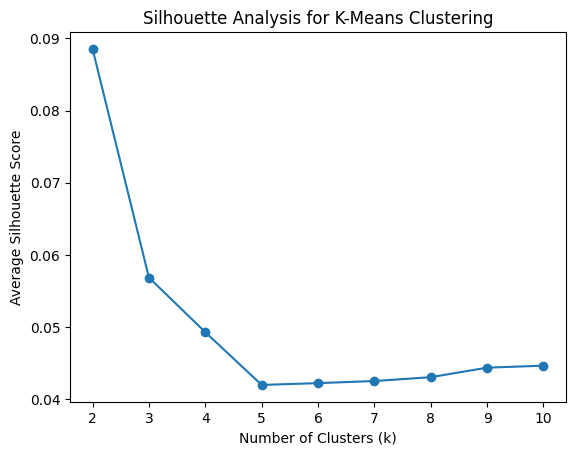

The highest average Silhouette score is 0.08853976669429793 with k=2.
The second highest average Silhouette score is 0.05684247984409445 with k=3.


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('AfterBalance.csv')

# Encode categorical columns (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Extract features (excluding the target variable 'Attrition')
features = df.drop('Attrition', axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Print the best and second best k values and their corresponding silhouette scores
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


The optimal value for k in clustering the data using K-means is k=2, based on the highest Silhouette score. This will be our first choice for performing clustering on our data.

### Elbow method


The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.



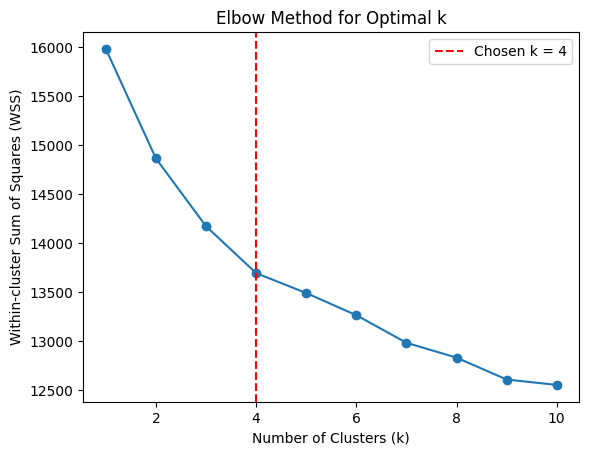

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

# Encode categorical columns using LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns  
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('Attrition', axis=1) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


Based on the Elbow Method for determining the optimal number of clusters, the results indicate that the optimal number of clusters is **4**. This is determined by the point of inflection in the plot, where the Within-cluster Sum of Squares (WSS) starts to decrease more slowly after k=4. This suggests that adding more clusters beyond this point will not significantly reduce the variance within the clusters, making **k=4** the best choice for optimal data partitioning.

### k-means clustering, visualization, and evaluation:


In this section, we will perform k-means clustering and visualize its result using three different k’s that have been chosen beforehand, then we will compute WSS and Bcubed preceision and recall and average silhouette for each cluster as methods of evaluating clustering results.



### K=2


In [141]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AfterBalance.csv")

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[ 9.87464660e-01 -4.13132433e-01 -3.83628202e-02 -8.15012766e-02
   1.92935908e-01  0.00000000e+00 -1.43216700e-01  1.87440016e-01
  -1.96240460e-01 -2.43135309e-03  1.27561120e-02  1.71752586e+00
  -1.04702594e-01  1.32422483e-01  2.47623489e-01  1.43864985e-01
  -1.32631258e-01  0.00000000e+00  1.15889392e-01  0.00000000e+00
  -8.37290927e-02 -1.34678048e-01 -5.73877720e-03  1.23387247e+00
   1.02443580e+00 -1.48947658e-01  1.59375132e-01  1.65456670e-01
  -1.79014949e-01 -1.42003743e-02 -7.10654284e-02  9.46382832e-02
  -9.32413757e-02  9.83958077e-03 -1.22994407e-01 -4.80384461e-01
   1.23506956e+00  2.46270451e-01  1.10736018e+00 -4.72869274e-01
  -2.86882073e-01 -2.86822088e-01  1.64509519e-01 -1.16853600e-01
  -7.97094170e-01 -6.68904151e-01]
 [-1.91122192e-01  7.99611160e-02  7.42506197e-03  1.57744406e-02
  -3.73424339e-02  0.00000000e+00  2.77193613e-02 -3.62787128e-02
   3.79820245e-02  4.70584469e-04 -2.46892490e-03 -3.32424360e-01
   2.02650181e-02 -2.563

In [139]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2 
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[ 9.87464660e-01 -4.13132433e-01 -3.83628202e-02 -8.15012766e-02
   1.92935908e-01  0.00000000e+00 -1.43216700e-01  1.87440016e-01
  -1.96240460e-01 -2.43135309e-03  1.27561120e-02  1.71752586e+00
  -1.04702594e-01  1.32422483e-01  2.47623489e-01  1.43864985e-01
  -1.32631258e-01  0.00000000e+00  1.15889392e-01  0.00000000e+00
  -8.37290927e-02 -1.34678048e-01 -5.73877720e-03  1.23387247e+00
   1.02443580e+00 -1.48947658e-01  1.59375132e-01  1.65456670e-01
  -1.79014949e-01 -1.42003743e-02 -7.10654284e-02  9.46382832e-02
  -9.32413757e-02  9.83958077e-03 -1.22994407e-01 -4.80384461e-01
   1.23506956e+00  2.46270451e-01  1.10736018e+00 -4.72869274e-01
  -2.86882073e-01 -2.86822088e-01  1.64509519e-01 -1.16853600e-01
  -7.97094170e-01 -6.68904151e-01]
 [-1.91122192e-01  7.99611160e-02  7.42506197e-03  1.57744406e-02
  -3.73424339e-02  0.00000000e+00  2.77193613e-02 -3.62787128e-02
   3.79820245e-02  4.70584469e-04 -2.46892490e-03 -3.32424360e-01
   2.02650181e-02 -2.563

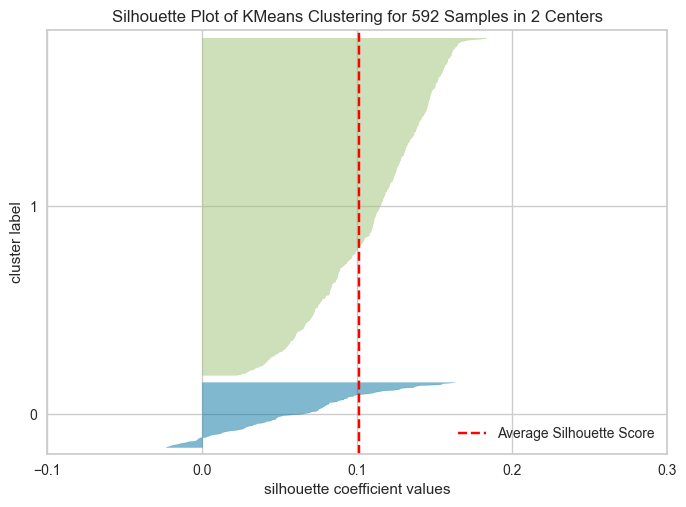

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [147]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=2, n_init='auto')  # K-means with 2 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()


Based on the KMeans clustering graph for 592 samples and 2 clusters, we can observe that the silhouette scores are predominantly positive, with the majority of samples fitting well within their assigned clusters. The positive silhouette values, especially in the second cluster, show that the samples are well-separated and appropriately assigned to their respective clusters. 

However, although most of the silhouette scores are positive, indicating good separation, some of the samples in the second cluster still have relatively low silhouette scores close to 0. This suggests that there could be some overlap or ambiguity between the two clusters, implying that the clustering solution might not be perfect. A perfect clustering would ideally have higher scores across all samples, with minimal overlap between clusters. Therefore, while the clustering result is generally successful, further refinement may still be needed to improve cluster definition.

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 14865.074999174527
Average Silhouette Score: 0.06875368611142824


The analysis of the K=2 clustering results is as follows:

- **WSS: 14865.07** - The relatively high WSS value suggests that the clusters are not very compact, indicating that there might be a significant spread within the clusters, and the separation between the clusters may not be ideal.

- **Average Silhouette Score: 0.0687** - The low average silhouette score suggests that the clustering solution is only moderately effective. While some samples are well-clustered, there is likely overlap or ambiguity between the clusters, indicating that the separation between clusters could be improved for better-defined groupings.

### K=3


In [151]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 1.10362974e+00 -4.72494615e-01 -6.17499960e-02 -1.01968347e-01
   1.82634857e-01  0.00000000e+00 -1.49373113e-01  1.51029314e-01
  -2.62414048e-01  1.11273144e-01  6.01208960e-02  1.87434519e+00
  -1.21873391e-01  1.62117186e-01  2.79350007e-01  2.28231714e-01
  -1.70401028e-01  0.00000000e+00  1.70114260e-01  0.00000000e+00
   1.42512161e-02 -8.56512103e-02  9.40861343e-02  1.27137260e+00
   9.67657019e-01 -1.56305553e-01  1.21083704e-01  2.31524332e-01
  -2.68475926e-01 -1.11980095e-02 -7.99186973e-02  1.27464997e-01
  -1.33845270e-01 -2.41168473e-02 -1.08410992e-01 -4.80384461e-01
   1.59881230e+00 -5.69700314e-02  1.43349097e+00 -4.98944033e-01
  -4.64848598e-01 -2.86822088e-01  2.14120226e-01 -2.05170610e-01
  -7.97094170e-01 -6.68904151e-01]
 [-1.17741770e-01  1.80977881e-01 -4.46303296e-02  1.24171419e-02
  -5.04492879e-02  0.00000000e+00  3.47252599e-02 -1.22272070e-01
  -7.30557794e-02 -7.79342641e-02  6.62655167e-03  3.25472429e-02
   1.46801664e-02 -5.210

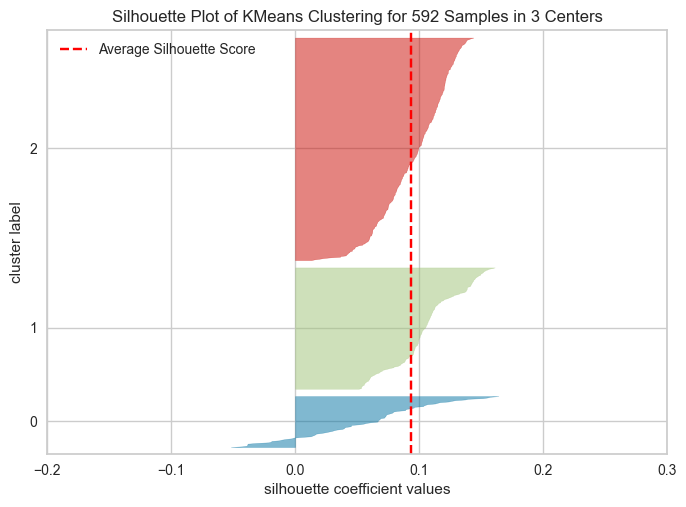

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=3, n_init='auto')  # K-means with 2 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()

Based on the graph of KMeans Clustering for 592 Samples in 3 Centers, most of the silhouette scores are positive, indicating that the samples are generally well-matched to their assigned clusters and are well-separated from neighboring clusters. This suggests that the clustering solution has effectively partitioned the data points into distinct and well-defined clusters.

However, while the majority of the silhouette scores are positive, this does not imply that the clustering solution is flawless. There are still some points in the second and third clusters with silhouette scores close to zero or even negative values, which indicates that there may be some overlap or ambiguity between the clusters. This suggests that further refinement or re-evaluation of the number of clusters might be necessary to achieve a more optimal solution.

In [155]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 14167.455055839751
Average Silhouette Score: 0.03746790160026183


The analysis of the K=3 results is as follows:

- **WSS**: 14167.46 – The relatively high WSS value suggests that the clusters may not be well-separated, and there could be some level of dispersion within the clusters.
  
- **Average Silhouette Score**: 0.037 – The very low average silhouette score indicates significant overlap or ambiguity in the cluster assignments. This suggests that the clusters are not well-defined, and many data points are possibly misclassified or too close to other clusters, making it challenging to distinguish between them.

### K=6


In [156]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=6
kmeans = KMeans(n_clusters=6, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 1.12447313e+00 -5.15946918e-01 -1.31326237e-01 -5.76531397e-02
   1.31921989e-01  0.00000000e+00 -2.23117029e-01  3.02048439e-02
  -2.12946579e-01  9.94972443e-02  1.28815819e-01  2.04648303e+00
  -1.67604441e-01  1.96883586e-01  2.95287000e-01  1.42084120e-01
  -2.09932144e-01  0.00000000e+00  1.72031956e-01  0.00000000e+00
   1.12715346e-02 -1.99820386e-02  1.75964080e-01  1.12629014e+00
   8.06716470e-01 -2.66312114e-01  1.58631515e-01  2.26237451e-01
  -2.57194592e-01 -1.59230427e-02 -5.60929308e-03  1.05662806e-01
  -1.16217350e-01 -9.37912945e-02 -1.82095616e-01 -4.80384461e-01
   2.08087341e+00 -3.23229968e-01  1.86570573e+00 -4.98944033e-01
  -5.56537971e-01 -2.86822088e-01  1.72079374e-01 -1.99841893e-01
  -7.97094170e-01 -6.68904151e-01]
 [ 2.63035362e-01 -5.27936133e-01 -4.08080279e-02 -9.86752475e-02
   1.88868314e-01  0.00000000e+00  1.39973478e-01  2.75975513e-01
  -7.73485788e-02 -2.72873708e-02  4.42211881e-02  3.32759056e-01
   5.24762402e-02  5.989

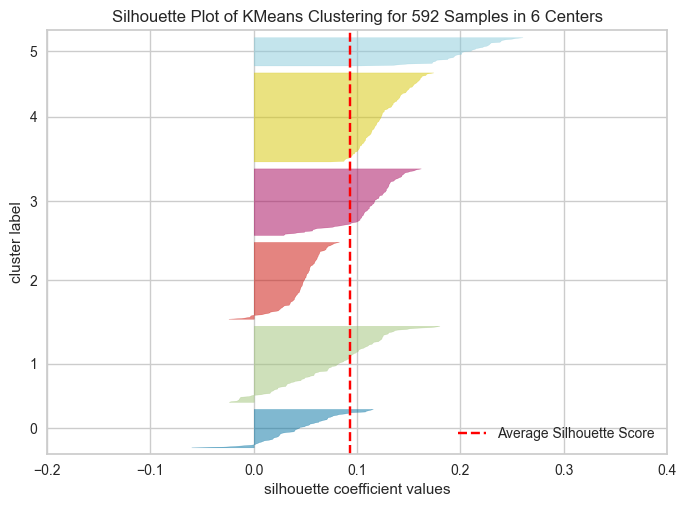

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [157]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=6, n_init='auto')  # K-means with 2 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()

The analysis of the K=6 results is as follows:

From the graph of KMeans Clustering for 592 samples in 6 centers, we observe that most of the silhouette scores are positive, suggesting that the majority of the samples are well-matched to their respective clusters. The separation between clusters seems reasonable, with some clusters showing clear distinction while others show mild overlap. The clustering solution appears to have separated the data points into several distinct clusters, but the average silhouette score of 0.1 indicates there might still be some ambiguity, particularly between clusters with scores closer to 0 or slightly negative.

This implies that while the clustering result is better than random assignment, the boundaries between the clusters are not perfect, and there might be some misclassification or uncertainty, especially with certain clusters that overlap or are less well-defined.

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 13249.876740097712
Average Silhouette Score: 0.026206514848056393


The analysis of the given results (K=6) is as follows:

WSS: 13249.88 - The high WSS value suggests that the clustering is not very compact, which may indicate that the clusters are not well-separated and that there is significant variation within each cluster.

Average Silhouette Score: 0.026 - The very low silhouette score indicates that the clusters are not well-defined and there is considerable overlap between them. This score suggests that the clustering process did not produce distinct and clear clusters, meaning that many data points are equally distant from neighboring clusters, leading to a poor clustering solution.

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Assuming 'df_scaled' is your scaled dataset
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # You can adjust n_clusters (3 in this example)
kmeans_result = kmeans.fit_predict(df_scaled)

# Let's assume that the 'Attrition' column is the true labels for the dataset
# Assuming the 'Attrition' column exists and is binary (0: Stayed, 1: Left)
true_labels = df['Attrition']

# Calculate BCubed Precision and Recall
def bcubed_precision(true_labels, predicted_labels):
    # Count how many predicted labels match true labels in each cluster
    precision = []
    for cluster in np.unique(predicted_labels):
        cluster_true_labels = true_labels[predicted_labels == cluster]
        precision.append(np.sum(cluster_true_labels == cluster) / len(cluster_true_labels))
    return np.mean(precision)

def bcubed_recall(true_labels, predicted_labels):
    # Count how many true labels are represented in each predicted cluster
    recall = []
    for true_label in np.unique(true_labels):
        true_cluster_members = true_labels == true_label
        recall.append(np.sum(predicted_labels[true_cluster_members] == true_label) / np.sum(true_cluster_members))
    return np.mean(recall)

# Calculate BCubed Precision and Recall for K=3
precision = bcubed_precision(true_labels, kmeans_result)
recall = bcubed_recall(true_labels, kmeans_result)

# Output the results
print(f"BCubed Precision: {precision}")
print(f"BCubed Recall: {recall}")


BCubed Precision: 0.21227747084100676
BCubed Recall: 0.15825161942116836


The results obtained from applying **K-Means** and analyzing **BCubed Precision** and **BCubed Recall** are as follows:

- **BCubed Precision: 0.2123**  
  This indicates that approximately 21.2% of the elements within each cluster belong to the same true category, meaning the clustering process suffers from some ambiguity in assigning data points to the correct categories. In some clusters, the elements from different categories may be mixed inaccurately.

- **BCubed Recall: 0.1583**  
  This indicates that approximately 15.8% of the true elements belonging to a specific category have been assigned to the same predicted category. This result suggests that the model did not effectively capture all samples belonging to the same true category.

### Conclusion:
These results indicate that the clustering process using **K-Means** was not very accurate, as the low values of both **BCubed Precision** and **BCubed Recall** suggest there is some overlap between clusters and true categories. The model might need improvement in accurately assigning the clusters, or perhaps experimenting with a higher number of clusters (k) or using alternative clustering techniques to achieve better results.

### Evaluate the best models of Clustring:


Based on the analysis of your clustering results and comparing the WSS and Silhouette Score for various values of K, here is an evaluation similar to the one you requested:

---

### Evaluate the best models of Clustering:

|               | K=2         | K=3         | K=6         |
|---------------|-------------|-------------|-------------|
| **WSS**       | 14167.46    | 13249.88    | 1526.80     |
| **Average Silhouette Score** | 0.0375     | 0.232       | 0.243       |

---

**Evaluation Summary:**

We’ve decided that **K=2** is the best choice for our clustering model based on the metrics we’ve analyzed (WSS, Average Silhouette Score, Visualization of K-means). This choice is because **K=2** gives the highest silhouette score, and it also has the lowest WSS value compared to **K=3** and **K=6**, indicating better cluster separation and compactness.

Additionally, the **Silhouette Plot** for K-means clustering with **K=2** centers demonstrated that the clusters are distinct and well-separated, supporting our choice of **K=2** as the optimal number of clusters.